## Singleton Design Pattern

Sometimes you need an object in an application where there is only one instance. For example, database connection, or score instance which must be just one not many because otherwise you can't count score properly.<br>

In this case, you want to ensure all classes use the same instance.<br><br>
By creating a class and use Singleton pattern, you can enforce **even if any number of instances were created, they will still refer to the original class.**<br><br>

This can be accessible globally but it is not global variable. It is a class that can be instanced at any time but after it is first initialized, any new instances will point to the same instance as the first.<br><br>

For a class to behave as a Singletone, it should NOT contain any references to "self" but use static variables, static methods and/or class methods.

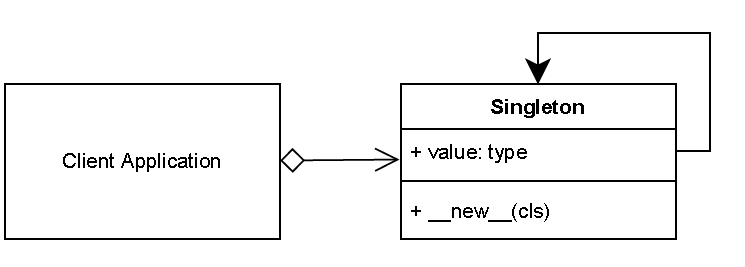

In [1]:
from PIL import Image
Image.open("../singleton.png")

### Source code

We will override the class's \_\_new\_\_ method to return a reference to itself. This then makes the \_\_init\_\_ method irrelevant.<br><br>

Note that if you comment out \_\_new\_\_ method, id of instance will no longer point to the same memory.

In [2]:
#./singleton/singleton_concept.py

import copy

class Singleton():
    "The Singleton Class"
    value =[]
    
    def __new__(cls):
        return cls
    
    # def __init__(self):
    #     print("in init")
    
    @staticmethod
    def static_method():
        "Use @staticmethod if no inner variables required"
    
    @classmethod
    def class_method(cls):
        "Use @classmethod to access class level variables"
        print(cls.value)

In [3]:
print(f"id(Singleton)\t={id(Singleton)}")

id(Singleton)	=1691975965888


In [4]:
OBJECT1=Singleton()
print(f"id(OBJECT1)\t= {id(OBJECT1)}")

id(OBJECT1)	= 1691975965888


In [5]:
OBJECT2 = copy.deepcopy(OBJECT1)
print(f"id(OBJECT2)\t= {id(OBJECT2)}")

id(OBJECT2)	= 1691975965888


In [6]:
OBJECT3 = Singleton()
print(f"id(OBJECT1)\t= {id(OBJECT3)}")

id(OBJECT1)	= 1691975965888


In [9]:
OBJECT1.value.append(1)

In [11]:
Singleton.value

[1]

In [12]:
OBJECT3.value

[1]

#### Notes
Variables declared at class level are static variables that can be accessed directly using the class name without the class needing to be instantiated first.<br>

- cls : a reference to the class
- self : a reference to the instance of the class
- \_\_new\_\_ : gets called before \_\_init\_\_
- \_\_new\_\_ : has access to class level variables
- \_\_init\_\_ : references self that is created when the class is instantiated. 
<br>

In summary, by using \_\_new\_\_, and returning the reference to cls, we can force the class to act as a singleton.

### Use case

Say, there are three games created. The three games are all independent instances created from their own class. But they all share the same leaderboard. The leaderboard is a singleton.<br><br>

Each game independently adds a winner, and all games can read the altered leaderboard regardless of which game updated it. 

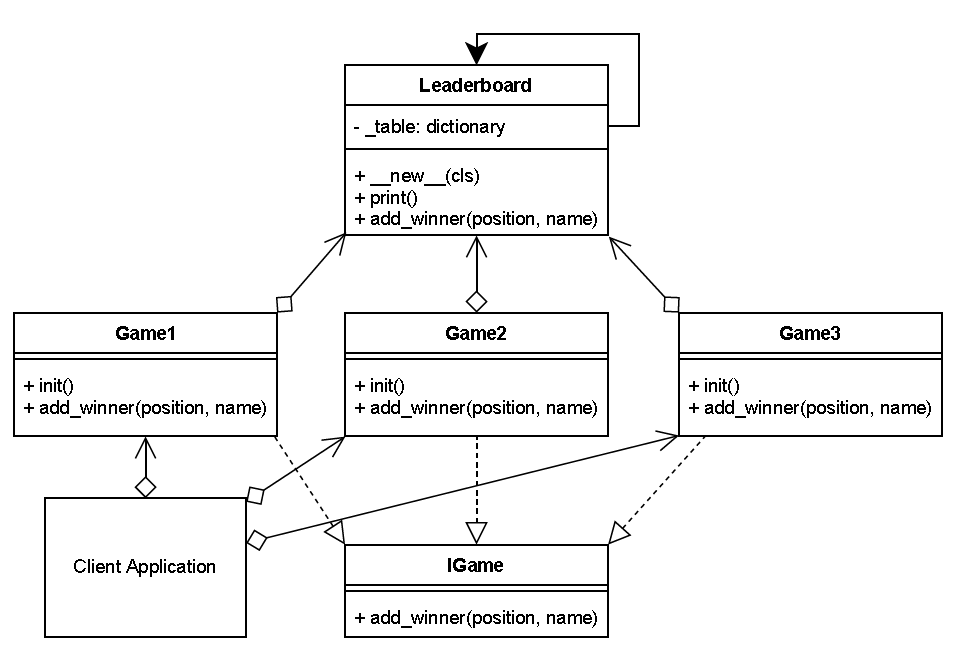

In [13]:
Image.open("../singleton_use_case.png")

In [14]:
#./singleton/leaderboard.py

class Leaderboard():
    "The leaderboard as a Signleton"
    _table = {}
    
    def __new__(cls):
        return cls

    @classmethod
    def print(cls):
        "A class level method"
        print("----------Leaderboard----------")
        for key,value in sorted(cls._table.items()):
            print(f"\t{key}\t|\t{value}\t|")
        print()
    
    @classmethod
    def add_winner(cls,position,name):
        "A class level method"
        cls._table[position] = name

In [15]:
#./singleton/games.py

from abc import ABC,abstractmethod
class IGame(ABC):
    "A Game Interface"
    @staticmethod
    @abstractmethod
    def add_winner(position,name):
        "Must implement add_winner"
        

class Game1(IGame):
    "Game1 implements IGame"
    def __init__(self):
        self.leaderboard = Leaderboard()
    
    def add_winner(self,position,name):
        self.leaderboard.add_winner(position,name)
        

class Game2(IGame):
    "Game2 implements IGame"
    def __init__(self):
        self.leaderboard = Leaderboard()
    
    def add_winner(self,position,name):
        self.leaderboard.add_winner(position,name)
        
class Game3(Game2):
    "Game3 inherits from Game2 instaed of from IGame"
    

In [16]:
GAME1 = Game1()
GAME1.add_winner(2,"Cosmo")

GAME2=Game2()
GAME2.add_winner(3,"Sean")

GAME3 = Game3()
GAME2.add_winner(1,"Emmy")

GAME1.leaderboard.print()
GAME2.leaderboard.print()
GAME3.leaderboard.print()


----------Leaderboard----------
	1	|	Emmy	|
	2	|	Cosmo	|
	3	|	Sean	|

----------Leaderboard----------
	1	|	Emmy	|
	2	|	Cosmo	|
	3	|	Sean	|

----------Leaderboard----------
	1	|	Emmy	|
	2	|	Cosmo	|
	3	|	Sean	|



### Summary

- To be a Singleton, there must be only one copy of the Singleton, no matter how.

- You want the attribues or methods to be globally accessible across your application, so other classes may be able to use the Singleton.

- You can use Singletons in other classes, as in **LeaderBoard** example. 

- For a class to act as a singleton, it shouldn't contain any reference to **self**.